In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [31]:
df = pd.read_csv('superheroes_data.csv')
df

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,Yellowjacket II,50.0,10.0,35.0,28.0,31.0,28.0,Rita DeMara,No alter egos found.,...,Human,"[""5'5"", '165 cm']","['115 lb', '52 kg']",Blue,Strawberry Blond,"Adventurer; former criminal, electronics engineer",New York City area,"Formerly Guardians of the Galaxy, Avengers, Ma...",-,https://www.superherodb.com/pictures2/portrait...
727,728,Ymir,50.0,100.0,27.0,100.0,98.0,28.0,Ymir,No alter egos found.,...,Frost Giant,"['1000', '304.8 meters']","['- lb', '0 kg']",White,No Hair,-,Niffleheim,-,"Utgard-Loki, Loki, and the race of Frost Giant...",https://www.superherodb.com/pictures2/portrait...
728,729,Yoda,88.0,52.0,33.0,25.0,100.0,90.0,Yoda,No alter egos found.,...,Yoda's species,"[""2'2"", '66 cm']","['38 lb', '17 kg']",Brown,White,-,-,"Jedi Order, Jedi High Counsl, Galactic Republic","Master: N'Kata Del Gormo, Apprentices: Dooku, ...",https://www.superherodb.com/pictures2/portrait...
729,730,Zatanna,81.0,10.0,23.0,28.0,100.0,56.0,Zatanna Zatara,No alter egos found.,...,Human,"[""5'7"", '170 cm']","['127 lb', '57 kg']",Blue,Black,-,-,"Misty Kilgore, Seven Soldiers of Victory, Just...","Giovanni ""John"" Zatara (father, deceased), Sin...",https://www.superherodb.com/pictures2/portrait...


### Описание атрибутов датасета

1. **id**: Уникальный идентификатор каждого супергероя.
2. **name**: Основное имя супергероя.
3. **intelligence**: Уровень интеллекта героя по шкале оценки.
4. **strength**: Физическая сила героя по шкале оценки.
5. **speed**: Скорость движения или реакции героя по шкале оценки.
6. **durability**: Выносливость и способность выдерживать повреждения по шкале оценки.
7. **power**: Специальные силы или способности, которыми обладает герой (например, полёт, телекинез).
8. **combat**: Боевые навыки и умения героя по шкале оценки.
9. **full-name**: Полное имя персонажа (если отличается от основного имени).
10. **alter-egos**: Альтернативные личности или псевдонимы, под которыми известен персонаж.
11. **place-of-birth**: Место рождения персонажа.

12. **first-appearance**: Дата первого появления персонажа в комиксе или другом медиа.

13. **publisher**: Издательство (компания), выпускающее комиксы с этим персонажем.

14. **alignment**: Моральная ориентация: добро, зло или нейтралитет.

15. ***gender***:  Пол персонажа.

16.***race***:  Расовая принадлежность или вид (человек, инопланетянин и т.д.).

17.***height*** и ***weight***: Физические характеристики — рост и вес в соответствующих единицах измерения.

18.***eye-color*** и ***hair-color***: Цвет глаз и волос у персонажа.

19.***occupation***: Профессия до получения сил/статуса супергероя либо текущая профессия вне роли героя.

20.***base***: Основная база операций для команды/группировки к которой принадлежит этот герой

21.***group-affiliation***: Принадлежность к определённой группе супергероев (например Мстители).

22.***relatives***: Родственники, значимые для сюжета

23.***url***: Ссылка на дополнительную информацию о персонаже


In [32]:
# Удалим ненужные колонки
df.drop(columns='id',inplace=True)
df.drop(columns='full-name',inplace=True)
df.drop(columns='url',inplace=True)
df.drop(columns='relatives',inplace=True)
df.drop(columns='alter-egos',inplace=True)
df.drop(columns='eye-color',inplace=True)
df.drop(columns='hair-color',inplace=True)
df.drop(columns='name',inplace=True)
df.drop(columns='group-affiliation',inplace=True)
df.drop(columns='occupation',inplace=True)
df.drop(columns='base',inplace=True)
df.drop(columns='publisher',inplace=True)
df.drop(columns='aliases',inplace=True)
df.drop(columns='place-of-birth',inplace=True)
df.drop(columns='first-appearance',inplace=True)
df.drop(columns='race',inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intelligence  566 non-null    float64
 1   strength      629 non-null    float64
 2   speed         566 non-null    float64
 3   durability    566 non-null    float64
 4   power         566 non-null    float64
 5   combat        566 non-null    float64
 6   alignment     731 non-null    object 
 7   gender        731 non-null    object 
 8   height        731 non-null    object 
 9   weight        731 non-null    object 
dtypes: float64(6), object(4)
memory usage: 57.2+ KB


Датасет состоит из 731 записи и 10 признаков.
Шесть столбцов содержат числовые данные, четыре столбца содержат данные типа object.

In [34]:
# Рассмотрим кол-во пустых значений
df.isna().sum()

intelligence    165
strength        102
speed           165
durability      165
power           165
combat          165
alignment         0
gender            0
height            0
weight            0
dtype: int64

Имеем значительное количество пропусков.

In [35]:
data = pd.DataFrame()

data.index =  df.columns
data['count_NaN'] = df.isna().sum()
data['dtypes'] = df.dtypes
data['uniq'] = df.nunique()
data['repeat'] = df.shape[0] - data['uniq']
data['shape'] = df.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
intelligence,165,float64,19,712,731
strength,102,float64,81,650,731
speed,165,float64,43,688,731
durability,165,float64,41,690,731
power,165,float64,95,636,731
combat,165,float64,38,693,731
alignment,0,object,4,727,731
gender,0,object,3,728,731
height,0,object,71,660,731
weight,0,object,169,562,731


В числовых столбцах наблюдается большое количество повторяющихся значений

In [36]:
# Анализируем пропущенные данные с помощью метода loc()
df.loc[df['intelligence'].isnull() | df['combat'].isnull() | df['durability'].isnull() | df['strength'].isnull() | df['speed'].isnull() | df['power'].isnull()]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
8,NaN,46.0,NaN,NaN,NaN,NaN,good,Female,"[""5'8"", '173 cm']","['135 lb', '61 kg']"
15,NaN,37.0,NaN,NaN,NaN,NaN,good,Male,"['-', '0 cm']","['- lb', '0 kg']"
18,NaN,NaN,NaN,NaN,NaN,NaN,good,Male,"['-', '0 cm']","['- lb', '0 kg']"
20,NaN,NaN,NaN,NaN,NaN,NaN,bad,Male,"[""6'2"", '188 cm']","['225 lb', '101 kg']"
21,NaN,NaN,NaN,NaN,NaN,NaN,good,Male,"['-', '0 cm']","['- lb', '0 kg']"
...,...,...,...,...,...,...,...,...,...,...
709,NaN,NaN,NaN,NaN,NaN,NaN,bad,Male,"['-', '0 cm']","['- lb', '0 kg']"
711,NaN,NaN,NaN,NaN,NaN,NaN,good,Female,"[""5'10'"", '178 cm']","['144 lb', '65 kg']"
714,NaN,NaN,NaN,NaN,NaN,NaN,good,-,"[""4'7'"", '140 cm']","['87 lb', '39 kg']"
720,NaN,NaN,NaN,NaN,NaN,NaN,good,Female,"['-', '0 cm']","['- lb', '0 kg']"


Можно заметить, что в большинстве случаев значения пропущены практически во всей строке.

In [37]:
#Удаляем строки, в которых хотя бы один из столбцов содержит пропущенные значения
df = df[~(df['intelligence'].isnull() | 
           df['combat'].isnull() | 
           df['durability'].isnull() | 
           df['strength'].isnull() | 
           df['speed'].isnull() | 
           df['power'].isnull())]

In [38]:
df.loc[df['intelligence'].isnull() | df['combat'].isnull() | df['durability'].isnull() | df['strength'].isnull() | df['speed'].isnull() | df['power'].isnull()]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 730
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intelligence  566 non-null    float64
 1   strength      566 non-null    float64
 2   speed         566 non-null    float64
 3   durability    566 non-null    float64
 4   power         566 non-null    float64
 5   combat        566 non-null    float64
 6   alignment     566 non-null    object 
 7   gender        566 non-null    object 
 8   height        566 non-null    object 
 9   weight        566 non-null    object 
dtypes: float64(6), object(4)
memory usage: 48.6+ KB


In [40]:
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,good,Male,"[""6'8"", '203 cm']","['980 lb', '441 kg']"
1,88.0,28.0,35.0,65.0,100.0,85.0,good,Male,"[""6'3"", '191 cm']","['145 lb', '65 kg']"
2,50.0,90.0,53.0,64.0,99.0,65.0,good,Male,"[""6'1"", '185 cm']","['200 lb', '90 kg']"
3,63.0,80.0,53.0,90.0,62.0,95.0,bad,Male,"[""6'8"", '203 cm']","['980 lb', '441 kg']"
4,88.0,63.0,83.0,100.0,100.0,55.0,bad,Male,"['-', '0 cm']","['- lb', '0 kg']"


In [41]:
df['alignment'].unique()

array(['good', 'bad', '-', 'neutral'], dtype=object)

In [42]:
df['gender'].unique()

array(['Male', 'Female', '-'], dtype=object)

In [43]:
df['gender'] = df['gender'].replace('-', 'Unknown')
unique_genders = df['gender'].unique()
print(unique_genders)

['Male' 'Female' 'Unknown']


C:\Users\user\AppData\Local\Temp\ipykernel_4788\4166999292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace('-', 'Unknown')


In [44]:
# Заменяем значения гендера на числовые
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2, 'Unknown': 0})
# Изменяем тип данных на int
df['gender'] = df['gender'].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_4788\848665161.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2, 'Unknown': 0})
C:\Users\user\AppData\Local\Temp\ipykernel_4788\848665161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = df['gender'].replace({'Male': 1, 'Female': 2, 'Unknown': 0})
C:\Users\user\AppData\Local\Temp\ipykernel_4788\848665161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [45]:
df[df['alignment'] == '-']

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
33,75.0,60.0,65.0,90.0,96.0,84.0,-,1,"[""7'6"", '229 cm']","['795 lb', '358 kg']"
110,50.0,28.0,8.0,30.0,69.0,25.0,-,1,"[""6'2"", '188 cm']","['195 lb', '88 kg']"
138,69.0,32.0,25.0,40.0,27.0,15.0,-,1,"[""6'4"", '193 cm']","['- lb', '0 kg']"
425,100.0,100.0,100.0,100.0,100.0,100.0,-,0,"['-', '0 cm']","['- lb', '0 kg']"
532,100.0,12.0,17.0,100.0,100.0,40.0,-,1,"['-', '0 cm']","['- lb', '0 kg']"
689,69.0,57.0,63.0,100.0,100.0,100.0,-,1,"[""7'5"", '226 cm']","['- lb', '0 kg']"


In [46]:
df = df[df['alignment'] != '-']

In [47]:
df['alignment'] = df['alignment'].replace({'good': 1, 'bad': 2, 'neutral': 0})

# Изменяем тип данных на int
df['alignment'] = df['alignment'].astype(int)

# Проверяем уникальные значения
unique_alignment = df['alignment'].unique()

C:\Users\user\AppData\Local\Temp\ipykernel_4788\2499647028.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['alignment'] = df['alignment'].replace({'good': 1, 'bad': 2, 'neutral': 0})


In [48]:
unique_alignment

array([1, 2, 0])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 730
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   intelligence  560 non-null    float64
 1   strength      560 non-null    float64
 2   speed         560 non-null    float64
 3   durability    560 non-null    float64
 4   power         560 non-null    float64
 5   combat        560 non-null    float64
 6   alignment     560 non-null    int32  
 7   gender        560 non-null    int32  
 8   height        560 non-null    object 
 9   weight        560 non-null    object 
dtypes: float64(6), int32(2), object(2)
memory usage: 43.8+ KB


In [50]:
df['height'] = df['height'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df['weight'] = df['weight'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1,1,"""68"", 203 cm","980 lb, 441 kg"
1,88.0,28.0,35.0,65.0,100.0,85.0,1,1,"""63"", 191 cm","145 lb, 65 kg"
2,50.0,90.0,53.0,64.0,99.0,65.0,1,1,"""61"", 185 cm","200 lb, 90 kg"
3,63.0,80.0,53.0,90.0,62.0,95.0,2,1,"""68"", 203 cm","980 lb, 441 kg"
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,"-, 0 cm","- lb, 0 kg"


In [51]:
# Оставляем только значения в см для height и кг для weight
df['height'] = df['height'].str.extract(r'(\d+)\s*cm')[0]
df['weight'] = df['weight'].str.extract(r'(\d+)\s*kg')[0]
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1,1,203,441
1,88.0,28.0,35.0,65.0,100.0,85.0,1,1,191,65
2,50.0,90.0,53.0,64.0,99.0,65.0,1,1,185,90
3,63.0,80.0,53.0,90.0,62.0,95.0,2,1,203,441
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,0,0


In [52]:
df.replace("-", "Unknown", inplace=True)
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1,1,203,441
1,88.0,28.0,35.0,65.0,100.0,85.0,1,1,191,65
2,50.0,90.0,53.0,64.0,99.0,65.0,1,1,185,90
3,63.0,80.0,53.0,90.0,62.0,95.0,2,1,203,441
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,0,0


In [53]:
df[(df['height'] == '0') & (df['weight'] == '0')]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,0,0
6,63.0,10.0,12.0,100.0,100.0,64.0,1,1,0,0
14,50.0,80.0,42.0,90.0,100.0,50.0,2,1,0,0
22,75.0,30.0,58.0,90.0,100.0,75.0,1,1,0,0
35,10.0,16.0,12.0,14.0,37.0,14.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
646,75.0,10.0,12.0,28.0,91.0,56.0,2,1,0,0
655,38.0,10.0,23.0,32.0,22.0,64.0,1,1,0,0
708,100.0,80.0,67.0,89.0,100.0,56.0,1,1,0,0
710,63.0,7.0,33.0,15.0,49.0,90.0,2,2,0,0


In [54]:
df['height'] = df['height'].astype(float)
df['weight'] = df['weight'].astype(float)

In [55]:
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1,1,203.0,441.0
1,88.0,28.0,35.0,65.0,100.0,85.0,1,1,191.0,65.0
2,50.0,90.0,53.0,64.0,99.0,65.0,1,1,185.0,90.0
3,63.0,80.0,53.0,90.0,62.0,95.0,2,1,203.0,441.0
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,0.0,0.0


In [56]:
# Вычисление медианы, игнорируя NaN
height_median = df['height'].median()
weight_median = df['weight'].median()

# Замена значений 0.0 на медиану
df['height'] = df['height'].replace(0.0, height_median)
df['weight'] = df['weight'].replace(0.0, weight_median)

Используем медианное значение, тк она устойчива к выбросам и у нас не симметричное распределение.

In [57]:
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1,1,203.0,441.0
1,88.0,28.0,35.0,65.0,100.0,85.0,1,1,191.0,65.0
2,50.0,90.0,53.0,64.0,99.0,65.0,1,1,185.0,90.0
3,63.0,80.0,53.0,90.0,62.0,95.0,2,1,203.0,441.0
4,88.0,63.0,83.0,100.0,100.0,55.0,2,1,178.0,74.0


## Идентификация корреляций между переменными

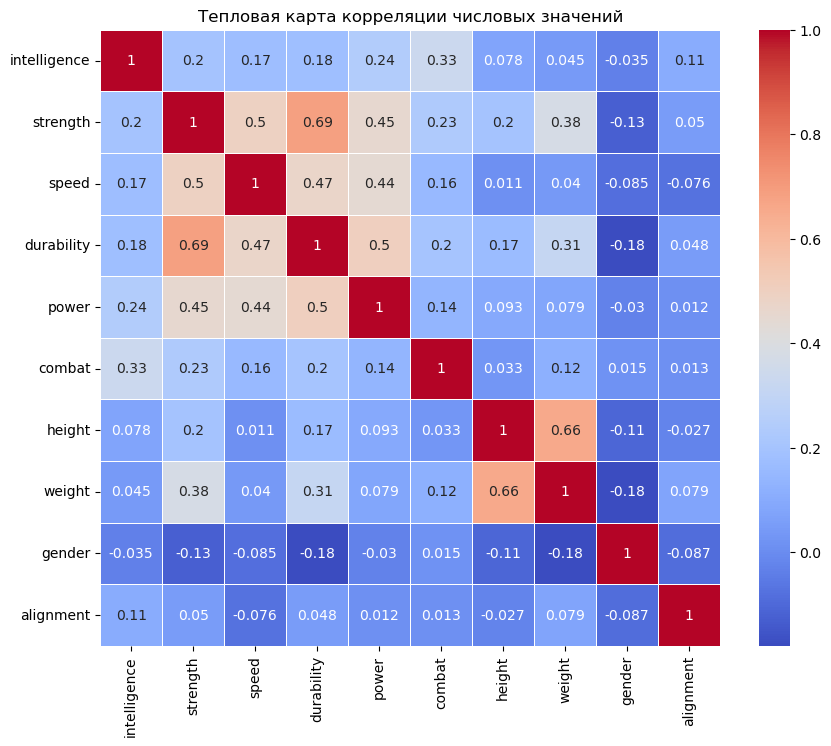

In [58]:
numeric_df = df[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 'height', 'weight', 'gender', 'alignment']]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True, linewidths=.5)
plt.title('Тепловая карта корреляции числовых значений')
plt.show()

**Сильная корреляция:**

strength и durability: персонажи с высокой силой как правило обладают высокой выносливостью.
height и weight: более высокие персонажи обычно тяжелее.

Сила и мощность, а также выносливость и мощность умеренно коррелируют.

Также можно заметить, что gender с strength и durability имеют отрицательную корреляцию, что указывают на то, что персонажи определенного пола (женского) имеют тенденцию к меньшей силе и выносливости.

## Распределение данных

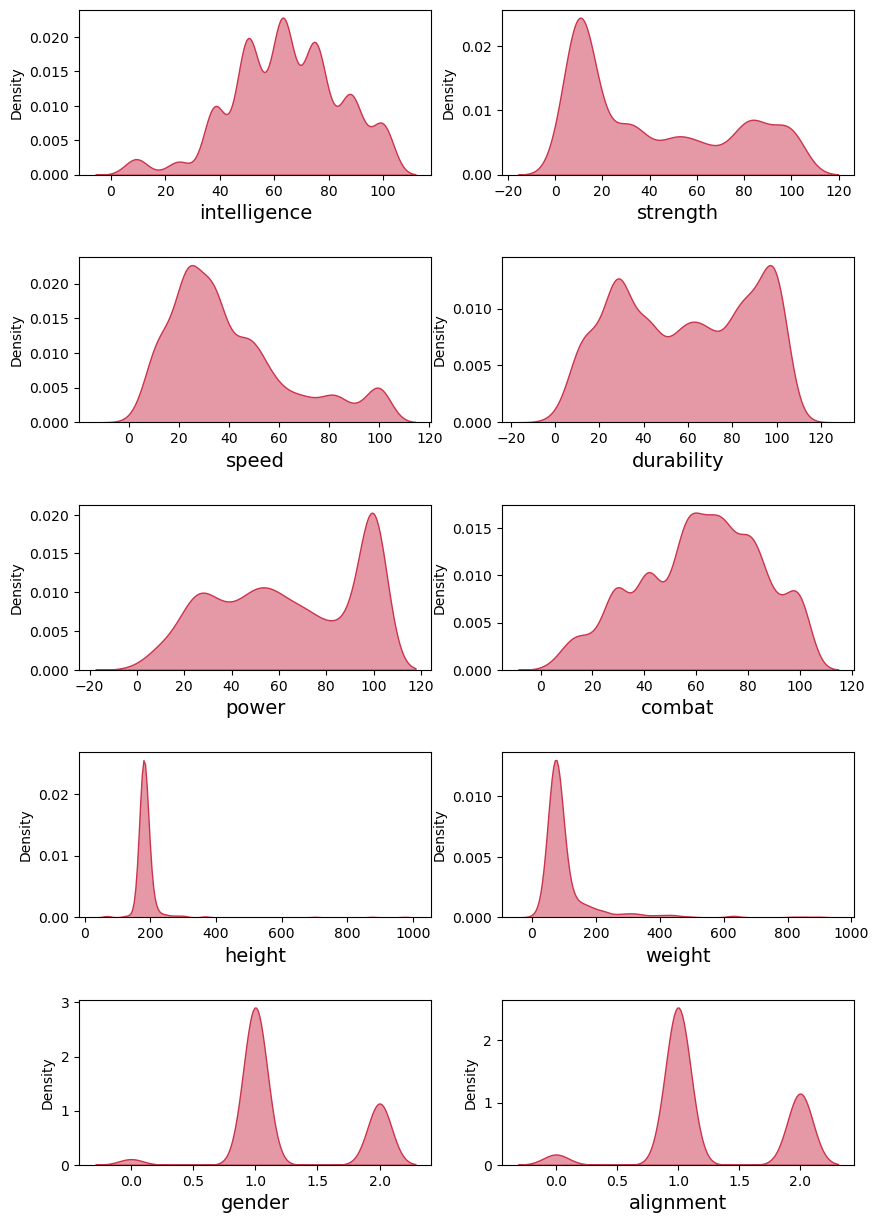

In [59]:
# Создаем матрицу графиков для визуализации распредления по каждой переменной
fig, axes = plt.subplots(5,2, figsize = (10,15))

# Расстояние между графиками
plt.subplots_adjust(hspace=0.5)

# Список значений признаков для цикла
columns = numeric_df.columns

# Строим распределения (kdeplot) для каждого признака
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = numeric_df,
                x = column,
                fill = True,
                alpha = 0.5,
                bw_adjust=.7,
                color = [0.8, 0.2, 0.3],
                ax = ax)
    
    ax.set_xlabel(column, fontsize = 14)
    

plt.show()

In [60]:
# Описательная статистика
df.describe()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,553.000000,553.000000
mean,64.308929,41.925000,40.183929,58.783929,64.053571,61.607143,1.255357,1.248214,186.954792,107.110307
std,19.966858,33.308791,24.308323,30.006405,29.769490,23.190182,0.525697,0.486854,54.931708,98.066565
min,6.000000,4.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,64.000000,14.000000
25%,50.000000,10.000000,23.000000,29.500000,38.000000,42.000000,1.000000,1.000000,175.000000,70.000000
50%,63.000000,32.000000,33.000000,60.000000,63.000000,64.000000,1.000000,1.000000,178.000000,74.000000
75%,75.000000,80.000000,50.000000,85.000000,100.000000,80.000000,2.000000,2.000000,188.000000,99.000000
max,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000,2.000000,2.000000,975.000000,900.000000


Большинство числовых признаков (интеллект, мощность, боевые навыки) имеют относительно симметричное распределение.

В моральной ориентации преобладают "хорошие", а в гендере - мужской пол.


# Просмотрим с 5 кластерами наш датасет


# Стандартизация данных

Приводим данные к среднему значению 0 и стандартному отклонению 1

In [61]:
df.fillna(0, inplace=True)  # Заменяем NaN на 0

# Изменение всех типов данных на int
df = df.astype(int)

# Инициализация скалера
scaler = StandardScaler()

# Применение скалирования
numeric_columns = df.select_dtypes(include=['int']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Проверка результата
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,-1.318808,1.745093,-0.954597,0.707684,-1.346660,0.103276,-0.486184,-0.510288,0.314981,3.417627
1,1.187581,-0.418432,-0.213448,0.207343,1.208572,1.009642,-0.486184,-0.510288,0.109359,-0.415661
2,-0.717275,1.444603,0.527701,0.173987,1.174950,0.146437,-0.486184,-0.510288,0.006548,-0.160788
3,-0.065614,1.144114,0.527701,1.041244,-0.069044,1.441244,1.417752,-0.510288,0.314981,3.417627
4,1.187581,0.633282,1.762950,1.374804,1.208572,-0.285166,1.417752,-0.510288,-0.113398,-0.323907


# AgglomerativeClustering

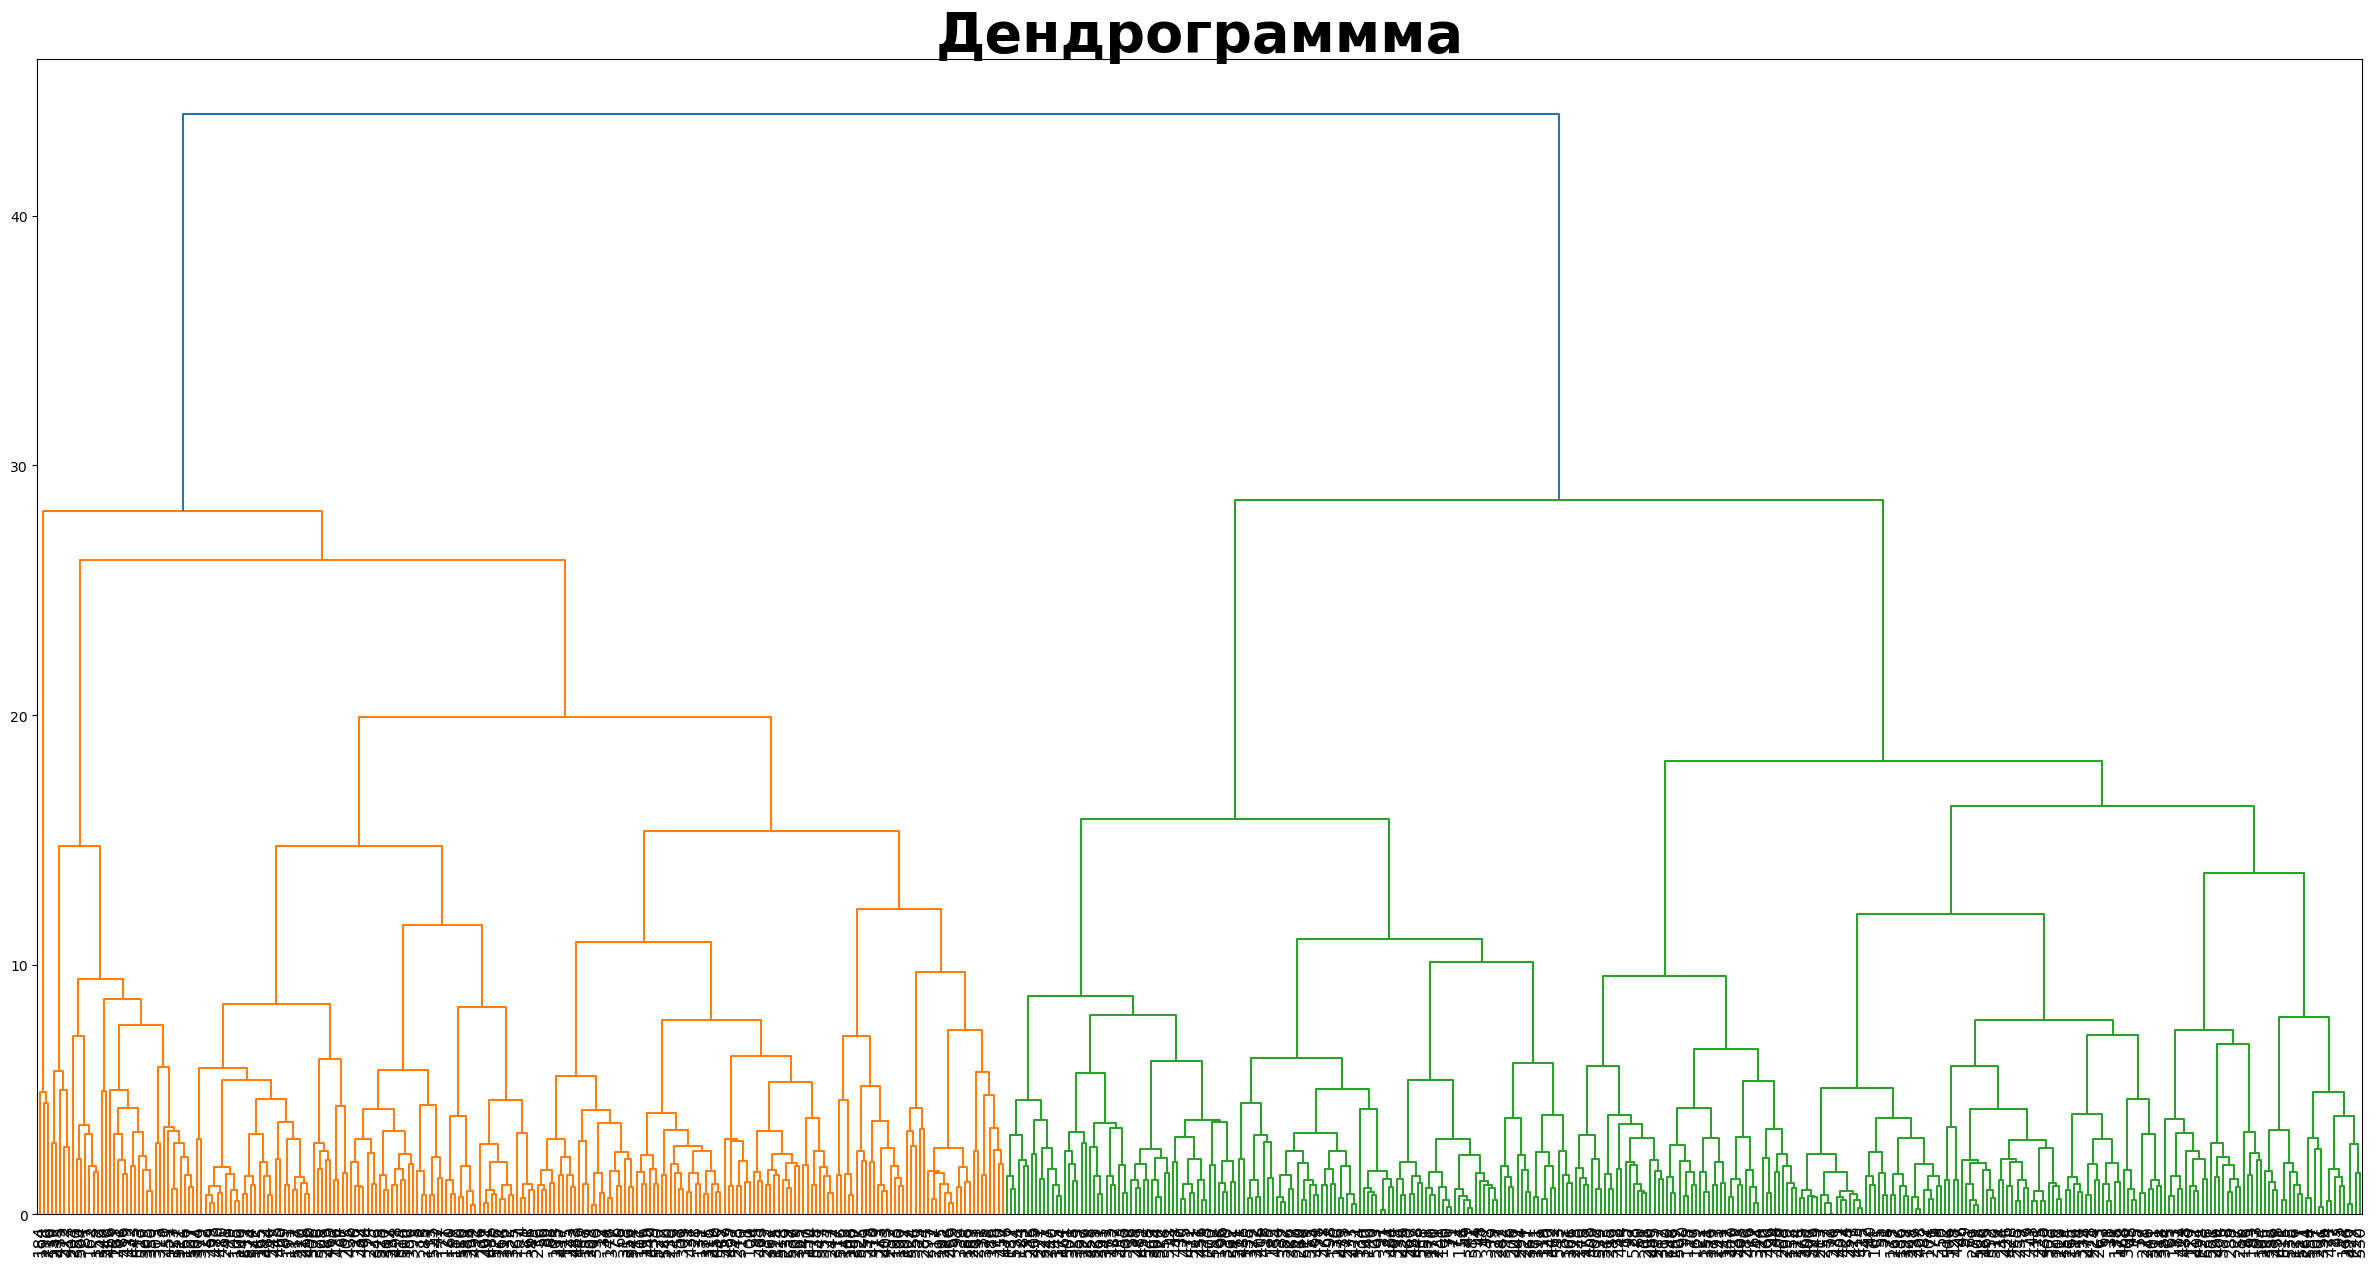

In [62]:
plt.figure(figsize=(30, 15))

shc.dendrogram(shc.linkage(df, method='ward'))
plt.xticks(fontsize = 12)
plt.title("Дендрограммма", fontweight = 'bold', fontsize = 40)
plt.show()

# Построение модели иерархической кластеризации


In [63]:
agg_cluster = AgglomerativeClustering(n_clusters = 5,
                                      linkage = 'ward')

In [64]:
agg_cluster.fit(df)

AgglomerativeClustering(n_clusters=5)

In [65]:
labels = agg_cluster.labels_
labels

array([4, 0, 0, 4, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 2, 0, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 4, 4,
       0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 4, 2, 0, 1, 4, 1, 1, 2, 0,
       0, 1, 2, 2, 1, 0, 1, 4, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 4, 1,
       1, 0, 0, 0, 1, 0, 2, 1, 4, 4, 0, 0, 4, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       3, 1, 2, 1, 0, 0, 4, 0, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 1,
       0, 2, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 4, 0, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 4, 1, 1, 0, 2, 2, 1, 1, 0, 4, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 1, 2,

### Метрика кластеризации для иерархической кластеризации

In [66]:
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Силуэт', round(silhouette,3))
print('Индекс Калински-Харабаса', round(chi,3))

Силуэт 0.164
Индекс Калински-Харабаса 84.522


Силуэт и индекс противоречат друг-другу.

In [67]:
data_labels = pd.DataFrame()
data_labels['Agglomerative'] = labels
data_labels.sample(10)

,Agglomerative
109,0
97,1
266,0
417,0
289,1
359,1
9,1
520,0
372,2
82,1


Большинство объектов пренадлежат к 0 кластеру.

# K-means

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

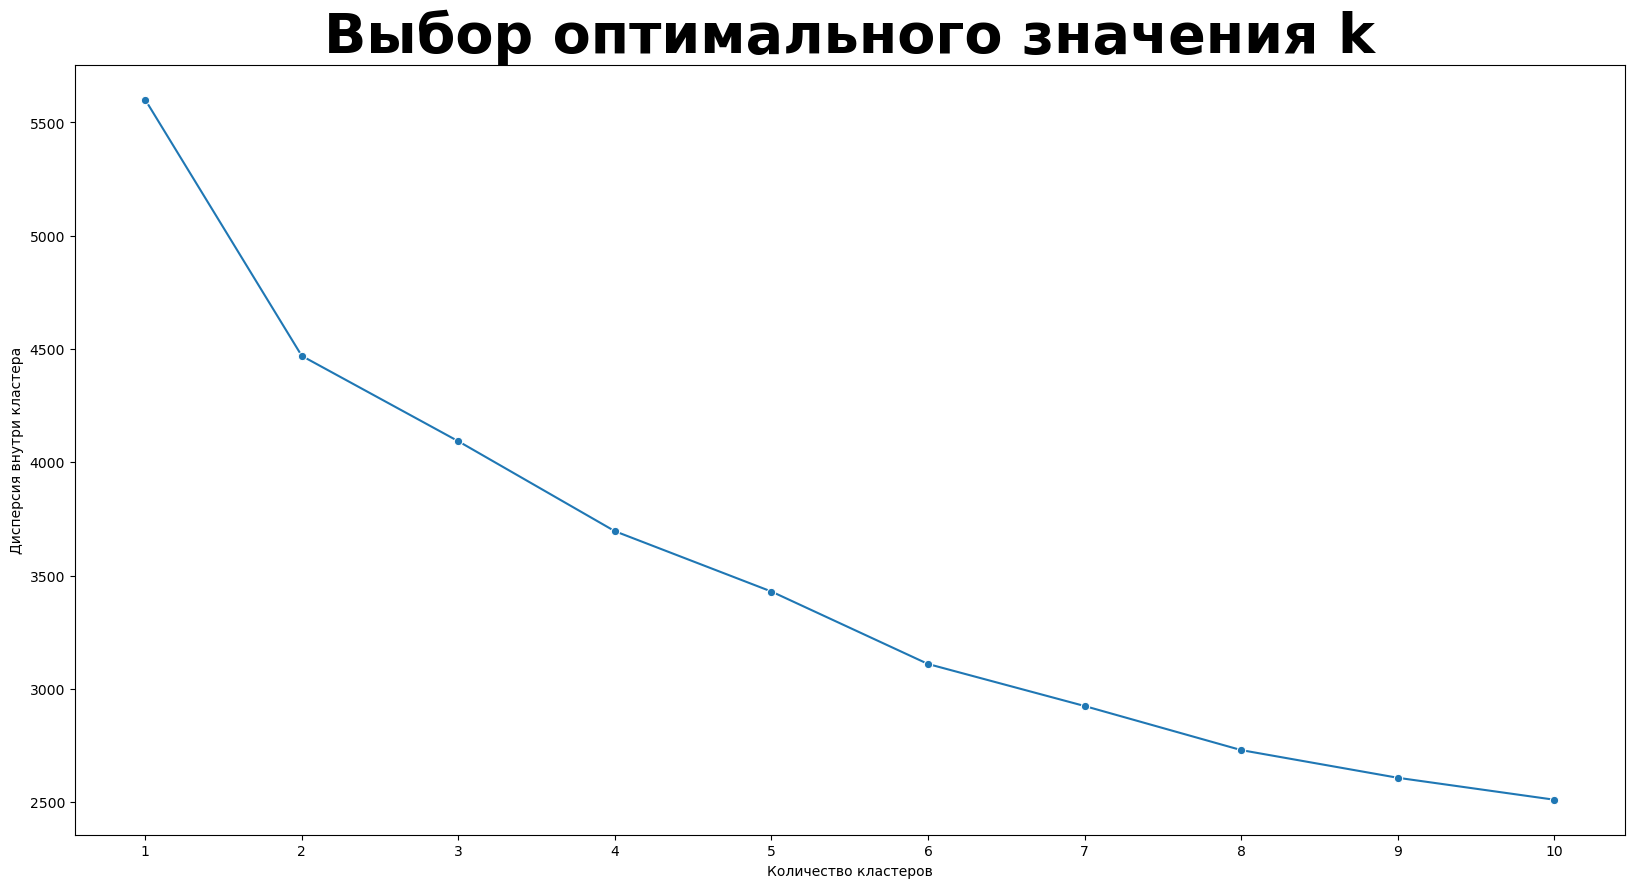

In [68]:
# Список для записи дисперсии
inertia_score = []

# Тренировка модели кластеризации с разным параметром k 
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df)
    inertia_score.append(kmeans.inertia_)
    
# Построение графика    
fig = plt.subplots(figsize = (20,10))
sns.lineplot(x = range(1,11),
             y = inertia_score,
             marker = 'o')
plt.title('Выбор оптимального значения k', fontsize = 40, fontweight = 'bold')
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия внутри кластера')
plt.xticks(range(1,11))

plt.show()

### Построение модели KMeans

In [69]:
kmeans = KMeans(n_clusters = 5,
                n_init = 10,
                algorithm = 'elkan')

kmeans.fit(df)

KMeans(algorithm='elkan', n_clusters=5, n_init=10)

In [70]:
# Метки класстеров
labels = kmeans.labels_
labels

array([3, 3, 3, 0, 0, 3, 3, 2, 2, 3, 0, 3, 3, 3, 2, 3, 0, 3, 2, 1, 1, 3,
       3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 1, 0, 0, 1, 1, 3, 3, 1, 2, 1, 3, 2,
       2, 2, 2, 1, 1, 1, 3, 2, 2, 3, 1, 3, 3, 2, 0, 0, 0, 2, 2, 2, 1, 2,
       3, 0, 0, 0, 1, 1, 1, 3, 2, 2, 1, 3, 2, 1, 3, 2, 2, 1, 1, 2, 3, 0,
       3, 3, 2, 1, 3, 2, 0, 2, 1, 2, 1, 2, 3, 1, 2, 3, 3, 0, 3, 2, 2, 0,
       0, 3, 3, 0, 1, 0, 3, 2, 2, 1, 1, 0, 3, 3, 1, 3, 2, 3, 1, 2, 1, 3,
       0, 2, 1, 1, 2, 3, 2, 0, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 0, 2,
       2, 3, 0, 3, 2, 3, 1, 2, 0, 3, 0, 0, 3, 0, 1, 3, 1, 1, 3, 1, 1, 2,
       3, 3, 3, 3, 2, 0, 0, 2, 4, 1, 3, 1, 3, 3, 3, 0, 3, 3, 2, 3, 2, 1,
       4, 2, 1, 2, 0, 3, 0, 0, 1, 3, 3, 0, 0, 2, 2, 2, 2, 2, 4, 3, 0, 2,
       0, 1, 2, 2, 3, 2, 1, 1, 2, 0, 3, 1, 0, 1, 1, 0, 3, 1, 1, 3, 3, 0,
       3, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 3, 2, 2, 1, 1, 2, 0, 3, 2, 0, 1, 1, 2, 2, 2, 3, 1, 0, 3, 3,
       2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 1,

### Метрики kmeans

In [71]:
data_labels['KMeans'] = labels
data_labels.sample(10)

,Agglomerative,KMeans
62,1,2
342,1,2
3,4,0
166,4,3
557,0,3
189,0,3
437,0,3
90,1,2
379,0,0
103,0,3


In [72]:
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Силуэт', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Силуэт 0.152
Variance Rarion Criterion 87.789


### Возвращаемся к исходному набору данных

In [73]:
columns = df.columns
df[columns] = scaler.inverse_transform(df[columns])
df.head()

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight
0,38.0,100.0,17.0,80.0,24.0,64.0,1.0,1.0,203.0,441.0
1,88.0,28.0,35.0,65.0,100.0,85.0,1.0,1.0,191.0,65.0
2,50.0,90.0,53.0,64.0,99.0,65.0,1.0,1.0,185.0,90.0
3,63.0,80.0,53.0,90.0,62.0,95.0,2.0,1.0,203.0,441.0
4,88.0,63.0,83.0,100.0,100.0,55.0,2.0,1.0,178.0,74.0


# Анализ каждого кластера

In [74]:
import pandas as pd

# Добавляем метки кластеров в DataFrame
df['Cluster'] = labels

# Список категориальных переменных
categorical_columns = columns

# Группируем по кластерам и вычисляем средние значения для каждой категории
cluster_means = df.groupby('Cluster')[categorical_columns].mean()

# Выводим результат
print(cluster_means)

         intelligence   strength      speed  durability      power     combat  \
Cluster                                                                         
0           80.798077  86.634615  67.557692   91.778846  92.730769  73.028846   
1           60.311111  27.740741  32.762963   44.103704  57.422222  59.318519   
2           62.892405  16.411392  24.177215   32.753165  39.860759  56.632911   
3           58.162500  49.150000  44.343750   74.843750  74.381250  61.031250   
4           75.000000  88.666667  46.333333   90.000000  91.666667  61.333333   

         alignment    gender      height      weight  
Cluster                                               
0         1.355769  1.144231  191.971154  184.471154  
1         1.133333  2.000000  173.681481   66.496296  
2         1.297468  0.955696  181.626582   85.265823  
3         1.262500  0.975000  179.531250  109.987500  
4         0.666667  1.000000  850.666667    0.000000  


# Spectral Clustering

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

X = df.iloc[:,[0,1,2,3,4,5,6,7,8,9]]
mms = MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)

In [76]:
X.isna().sum()

intelligence    0
strength        0
speed           0
durability      0
power           0
combat          0
alignment       0
gender          0
height          0
weight          0
dtype: int64

In [77]:
from sklearn.cluster import SpectralClustering


clustering_sp = SpectralClustering(5).fit(X)
labels = clustering_sp.labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [78]:
data_labels['Spectral'] = labels
data_labels.sample(10)

,Agglomerative,KMeans,Spectral
108,0,2,2
197,2,1,1
260,2,1,0
338,1,2,2
502,1,2,3
15,1,3,1
246,1,2,0
407,1,2,3
538,0,0,4
44,1,2,1


In [79]:
principal_df = pd.DataFrame(data = PCA(n_components=3).fit_transform(X))

Text(0, 0.5, 'PC2')

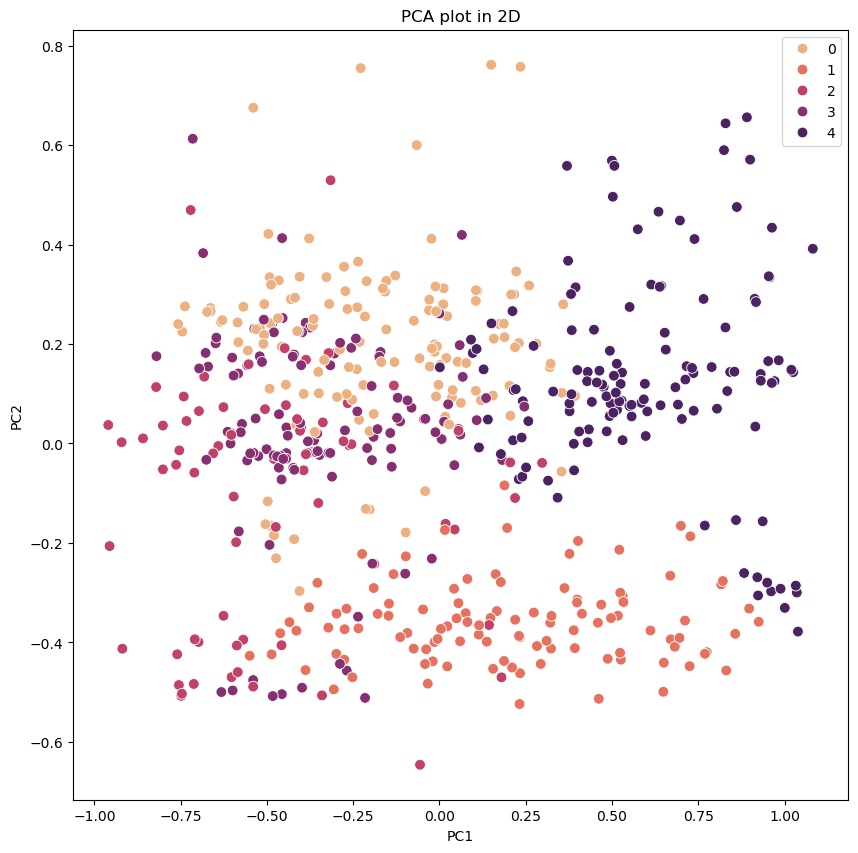

In [80]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x = principal_df.iloc[:,0], 
                y = principal_df.iloc[:,1], 
                hue = labels, 
                palette="flare", 
                s=60)
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [81]:
TSNEplot()

NameError: name 'TSNEplot' is not defined

In [ ]:
PCAplot3D(X)

In [ ]:
df

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
0,38.0,100.0,17.0,80.0,24.0,64.0,1.0,1.0,203.0,441.0,0
1,88.0,28.0,35.0,65.0,100.0,85.0,1.0,1.0,191.0,65.0,1
2,50.0,90.0,53.0,64.0,99.0,65.0,1.0,1.0,185.0,90.0,3
3,63.0,80.0,53.0,90.0,62.0,95.0,2.0,1.0,203.0,441.0,0
4,88.0,63.0,83.0,100.0,100.0,55.0,2.0,1.0,178.0,74.0,3
...,...,...,...,...,...,...,...,...,...,...,...
726,50.0,10.0,35.0,28.0,31.0,28.0,1.0,2.0,165.0,52.0,2
727,50.0,100.0,27.0,100.0,98.0,28.0,1.0,1.0,0.0,74.0,3
728,88.0,52.0,33.0,25.0,100.0,90.0,1.0,1.0,66.0,17.0,1
729,81.0,10.0,23.0,28.0,100.0,56.0,1.0,2.0,170.0,57.0,1


In [ ]:
df[df['Cluster']==0]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
0,38.0,100.0,17.0,80.0,24.0,64.0,1.0,1.0,203.0,441.0,0
3,63.0,80.0,53.0,90.0,62.0,95.0,2.0,1.0,203.0,441.0,0
17,50.0,28.0,42.0,90.0,57.0,60.0,2.0,1.0,244.0,169.0,0
42,75.0,82.0,35.0,80.0,84.0,101.0,1.0,1.0,185.0,270.0,0
48,63.0,100.0,42.0,100.0,27.0,80.0,2.0,1.0,198.0,126.0,0
118,10.0,83.0,23.0,95.0,28.0,72.0,2.0,1.0,178.0,230.0,0
119,63.0,80.0,33.0,80.0,100.0,84.0,2.0,2.0,218.0,495.0,0
176,50.0,95.0,33.0,100.0,23.0,60.0,1.0,1.0,183.0,170.0,0
184,63.0,83.0,33.0,100.0,45.0,80.0,1.0,1.0,226.0,225.0,0
203,88.0,100.0,83.0,100.0,100.0,95.0,2.0,1.0,267.0,817.0,0


In [ ]:
df[df['Cluster']==1]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
1,88.0,28.0,35.0,65.0,100.0,85.0,1.0,1.0,191.0,65.0,1
6,63.0,10.0,12.0,100.0,100.0,64.0,1.0,1.0,178.0,74.0,1
10,75.0,28.0,38.0,80.0,72.0,95.0,1.0,1.0,191.0,104.0,1
38,50.0,48.0,50.0,70.0,71.0,70.0,1.0,2.0,175.0,63.0,1
40,38.0,63.0,23.0,42.0,52.0,70.0,2.0,2.0,173.0,57.0,1
...,...,...,...,...,...,...,...,...,...,...,...
713,56.0,32.0,35.0,65.0,60.0,84.0,1.0,1.0,175.0,117.0,1
717,75.0,90.0,25.0,80.0,39.0,60.0,1.0,2.0,165.0,51.0,1
722,75.0,24.0,42.0,100.0,55.0,95.0,1.0,2.0,155.0,50.0,1
728,88.0,52.0,33.0,25.0,100.0,90.0,1.0,1.0,66.0,17.0,1


In [ ]:
df[df['Cluster']==2]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
7,69.0,10.0,33.0,40.0,37.0,50.0,1.0,1.0,185.0,88.0,2
9,10.0,8.0,13.0,5.0,5.0,20.0,1.0,1.0,178.0,81.0,2
12,56.0,48.0,35.0,80.0,34.0,55.0,2.0,1.0,193.0,90.0,2
16,63.0,10.0,17.0,10.0,7.0,55.0,1.0,1.0,178.0,72.0,2
23,63.0,13.0,46.0,64.0,28.0,42.0,1.0,1.0,183.0,68.0,2
...,...,...,...,...,...,...,...,...,...,...,...
707,63.0,17.0,58.0,52.0,29.0,42.0,1.0,2.0,163.0,50.0,2
712,50.0,32.0,23.0,100.0,77.0,42.0,1.0,1.0,178.0,74.0,2
721,10.0,10.0,12.0,1.0,1.0,56.0,1.0,1.0,196.0,117.0,2
725,88.0,10.0,12.0,28.0,12.0,14.0,1.0,1.0,183.0,83.0,2


In [ ]:
df[df['Cluster']==3]

,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
2,50.0,90.0,53.0,64.0,99.0,65.0,1.0,1.0,185.0,90.0,3
4,88.0,63.0,83.0,100.0,100.0,55.0,2.0,1.0,178.0,74.0,3
5,38.0,80.0,25.0,100.0,98.0,64.0,2.0,1.0,193.0,122.0,3
11,50.0,85.0,100.0,85.0,100.0,40.0,2.0,1.0,188.0,108.0,3
13,63.0,80.0,23.0,90.0,100.0,32.0,1.0,1.0,180.0,90.0,3
...,...,...,...,...,...,...,...,...,...,...,...
718,75.0,100.0,53.0,90.0,64.0,64.0,1.0,1.0,188.0,171.0,3
719,88.0,100.0,79.0,100.0,100.0,100.0,1.0,2.0,183.0,74.0,3
723,88.0,53.0,53.0,95.0,100.0,84.0,1.0,1.0,175.0,61.0,3
727,50.0,100.0,27.0,100.0,98.0,28.0,1.0,1.0,0.0,74.0,3


In [ ]:
df[df['Cluster']==4]


,intelligence,strength,speed,durability,power,combat,alignment,gender,height,weight,Cluster
255,50.0,81.0,23.0,100.0,75.0,70.0,1.0,1.0,975.0,0.0,4
272,100.0,100.0,83.0,100.0,100.0,50.0,0.0,1.0,876.0,0.0,4
302,75.0,85.0,33.0,70.0,100.0,64.0,1.0,1.0,701.0,0.0,4


In [ ]:
df.drop(df[df.Cluster == 4].index, inplace=True)

In [ ]:
df.Cluster.value_counts()

Cluster
1    199
3    165
2    141
0     52
Name: count, dtype: int64

### Теперь исходя из полученных данных, мы понимаем что внутри 0 кластера расположенны высокие, тяжелые и очень сильные герои.
### Внутри 1 кластера находятся обычные люди, но неплохо развиты по характеристикам. 
### Внутри 2 и 3 кластера находятся "среднички" мира супергероев, различия между кластерами только в поле супергероя

### Значения в 4 кластере аномальны, так что мы их удаляем

In [ ]:
df["Cluster"].value_counts()

Cluster
2    203
1    174
3    130
0     50
4      3
Name: count, dtype: int64

# Обучение моделей классификации

In [82]:
# Разделение данных на признаки и целевую переменную
X = df.drop(columns=['Cluster'])  # Признаки
y = df['Cluster']  # Целевая переменная (метки кластеров)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [85]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Итоги
    print(classification_report(y_test, y_pred))
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

In [87]:
# Модели для тестирования
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

In [88]:
# Оценка моделей
results = {}
for name, model in models.items():
    print(f"{name}")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      1.00      1.00        41
           2       0.95      0.98      0.96        54
           3       0.96      0.95      0.95        55
           4       1.00      1.00      1.00         1

    accuracy                           0.97       185
   macro avg       0.98      0.98      0.98       185
weighted avg       0.97      0.97      0.97       185

Decision Tree
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        34
           1       0.95      0.93      0.94        41
           2       0.88      0.91      0.89        54
           3       0.79      0.76      0.78        55
           4       0.00      0.00      0.00         1

    accuracy                           0.84       185
   macro avg       0.67      0.68      0.68       185
weighted avg       0.84      0.84      0.84

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packag

              precision    recall  f1-score   support

           0       0.93      0.82      0.88        34
           1       0.93      1.00      0.96        41
           2       0.96      0.96      0.96        54
           3       0.89      0.93      0.91        55
           4       0.00      0.00      0.00         1

    accuracy                           0.93       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.93      0.93      0.93       185



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [89]:
# Создание таблицы для сравнения моделей
results_df = pd.DataFrame(results).T
print("Сравнение моделей классификации:")
print(results_df)

Сравнение моделей классификации:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.972973   0.973352  0.972973  0.973005
Decision Tree        0.843243   0.839378  0.843243  0.840998
Random Forest        0.929730   0.925127  0.929730  0.926444


Logistic Regression показала идеальные результаты, но это может быть связано с переобучением или простотой данных.

Decision Tree и Random Forest показали хорошие результаты, но Random Forest работает лучше.

**Дашборд доступен по ссылке:**
https://datalens.yandex/67d6h2yjdanos

# Вывод

В ходе выполнения работы были проведены различные этапы анализа данных, включая предобработку, кластеризацию, снижение размерности и сравнение моделей классификации:

### 1. Предобработка данных

Были выполнены следующие шаги:

- Замена пропущенных значений на 0.
- Приведение данных к целочисленному типу.
- Нормализация данных с использованием `MinMaxScaler`.
- Удаление строк с пропущенными значениями.

---

### 2. Кластеризация

Были применены три метода кластеризации:

- **Agglomerative Clustering**.
- **K-Means**.
- **Spectral Clustering**.

Метрики качества кластеризации (силуэт и индекс Калински-Харабаса) показали, что:

- **K-Means** и **Spectral Clustering** дали умеренные результаты, но с некоторыми различиями в метках кластеров.
- **Agglomerative Clustering** показал схожие результаты с **Spectral Clustering**.

---

### 3. Снижение размерности

Для визуализации и упрощения данных был применен метод **PCA** (Principal Component Analysis).

- Данные были спроецированы на три главных компонентов.
- Визуализация данных на плоскости.

---

### 4. Сравнение моделей классификации

Были обучены и оценены три модели:

- **Logistic Regression**.
- **Decision Tree**.
- **Random Forest**.

Результаты:

- **Logistic Regression** показала идеальные результаты (`Accuracy = 1.0`).
- **Decision Tree** и **Random Forest** показали хорошие результаты (`Accuracy ~0.9`), причем **Random Forest** работал немного лучше.